In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('drug200.csv')
display(df)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [10]:
df['Sex'] = df['Sex'].replace({'M': 1, 'F': 0})
df['BP'] = df['BP'].replace({'HIGH':2, 'NORMAL':1, 'LOW': 0})
df['Cholesterol'] = df['Cholesterol'].replace({'HIGH':2, 'NORMAL':1, 'LOW': 0})
df['Drug'] = df['Drug'].replace({'drugY':0, 'drugC': 1, 'drugX':2,'drugA': 3, 'drugB': 4})

In [11]:
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,0
1,47,1,0,2,13.093,1
2,47,1,0,2,10.114,1
3,28,0,1,2,7.798,2
4,61,0,0,2,18.043,0


<AxesSubplot:xlabel='Age', ylabel='Density'>

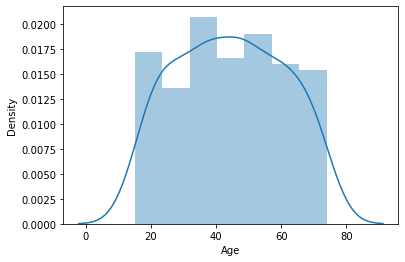

In [6]:
sns.distplot(df['Age'])

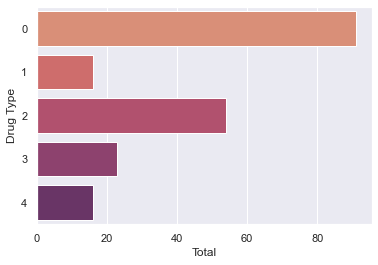

In [12]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

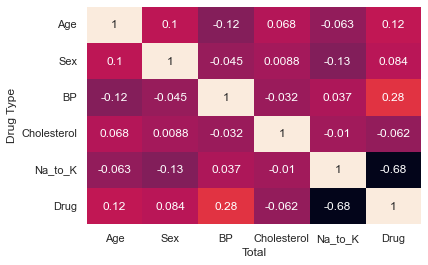

In [22]:
sns.set_theme(style="darkgrid")
sns.heatmap(df.corr() , annot=True, cbar=False)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

In [49]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [50]:
models = {
    'Regressão Logistica' : LogisticRegression(),
    'k-NN': KNeighborsClassifier(),
    'SVC' : SVC(),
}

for name, modelo in models.items():
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  metricas = metrics.classification_report(y_test,modelo.predict(X_test))
  print(f'{name} : Acurácia = {accuracy : .2f}')
  print(f'{name} : Metricas  \n {metricas :}' )

Regressão Logistica : Acurácia =  0.85
Regressão Logistica : Metricas  
               precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       1.00      0.33      0.50         6
           2       0.84      0.89      0.86        18
           3       1.00      0.71      0.83         7
           4       0.50      1.00      0.67         3

    accuracy                           0.85        60
   macro avg       0.85      0.78      0.76        60
weighted avg       0.88      0.85      0.84        60

k-NN : Acurácia =  0.68
k-NN : Metricas  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.33      0.17      0.22         6
           2       0.50      0.56      0.53        18
           3       0.38      0.43      0.40         7
           4       0.33      0.33      0.33         3

    accuracy                           0.68        60
   macro avg   

In [79]:
valores_reais = df['Drug'].sample(n=60, random_state = 42)
saida_regressao = models['Regressão Logistica'].predict(X_test)
saida_svc = models['SVC'].predict(X_test)
saida_knn = models['k-NN'].predict(X_test)

teste = {'valores_reais': valores_reais,
                     'Regressao' : saida_regressao,
                     'SVC': saida_svc,
                     'K-NN': saida_knn
                    }

data = pd.DataFrame(teste)


array([[<AxesSubplot:title={'center':'valores_reais'}>,
        <AxesSubplot:title={'center':'Regressao'}>],
       [<AxesSubplot:title={'center':'SVC'}>,
        <AxesSubplot:title={'center':'K-NN'}>]], dtype=object)

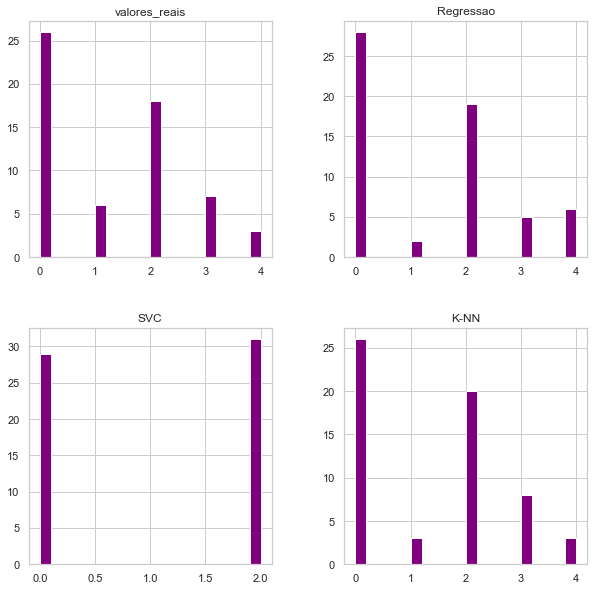

In [82]:
data.hist(bins = 20, color ='purple' ,figsize=(10,10))

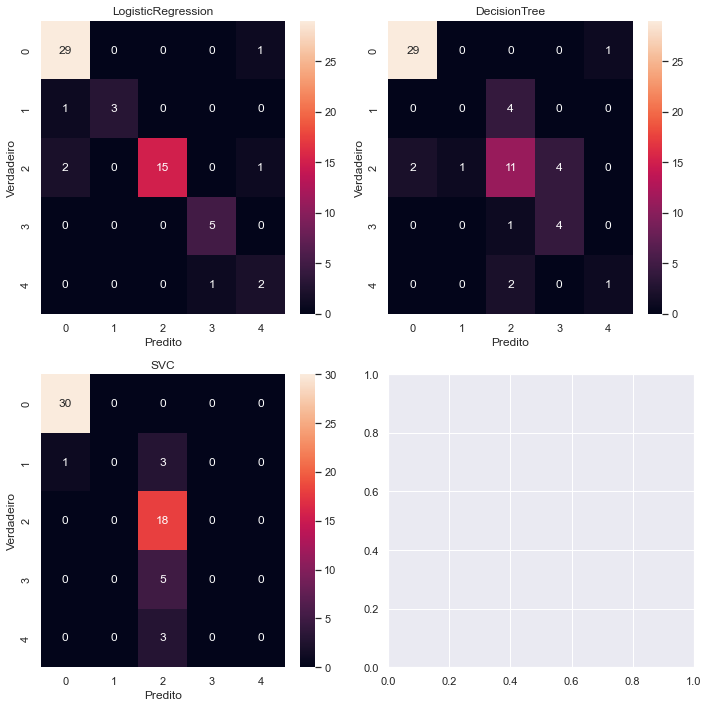

In [35]:
cm1 = confusion_matrix(y_test, models['Regressão Logistica'].predict(X_test))
cm2 = confusion_matrix(y_test, models['k-NN'].predict(X_test))
cm3 = confusion_matrix(y_test, models['SVC'].predict(X_test))

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.heatmap(cm1, annot=True, fmt='g', ax=axs[0, 0])
axs[0, 0].set_title('LogisticRegression')
axs[0, 0].set_xlabel('Predito')
axs[0, 0].set_ylabel('Verdadeiro')

# Plotar a matriz 2
sns.heatmap(cm2, annot=True, fmt='g', ax=axs[0, 1])
axs[0, 1].set_title('DecisionTree')
axs[0, 1].set_xlabel('Predito')
axs[0, 1].set_ylabel('Verdadeiro')

# Plotar a matriz 3
sns.heatmap(cm3, annot=True,fmt='g', ax=axs[1, 0])
axs[1, 0].set_title('SVC')
axs[1, 0].set_xlabel('Predito')
axs[1, 0].set_ylabel('Verdadeiro')

plt.tight_layout()
plt.show()